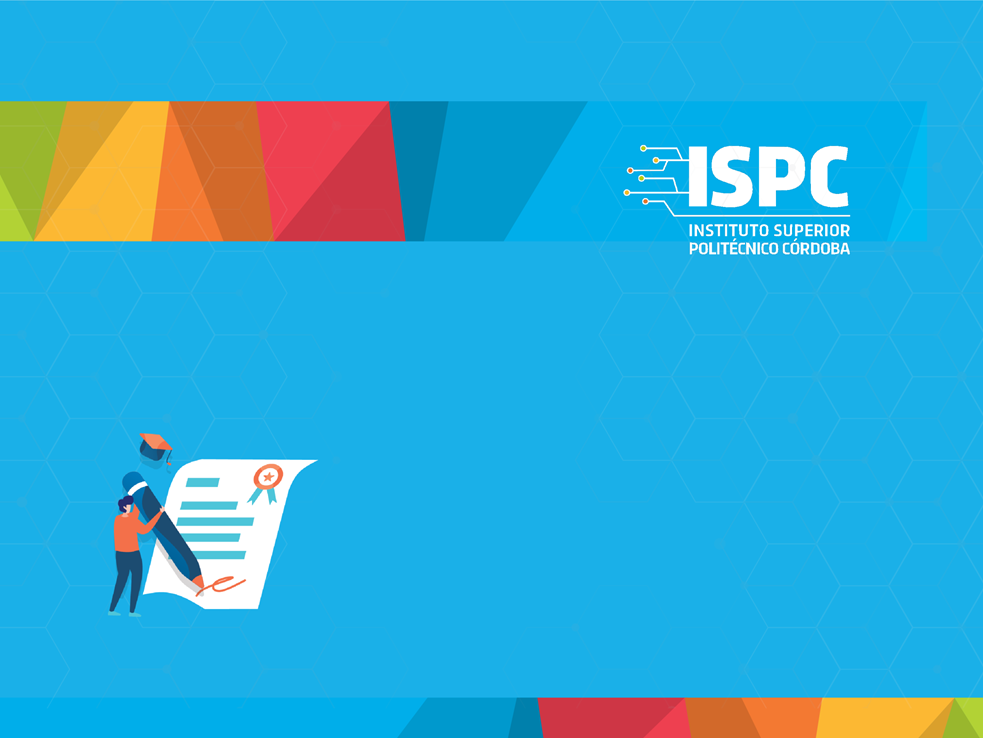

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [1]:
# !pip install mlxtend

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import make_regression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [3]:
# Datos
# ==============================================================================
n_samples, n_features = 200, 2
rng = np.random.RandomState(0)
X,y = make_regression(n_samples, n_features, noise = 20, random_state=rng)

datos_creados = np.c_[X,y]
datos = pd.DataFrame(datos_creados, columns = ['X1', 'X2', 'y' ])

In [4]:
datos

,X1,X2,y
0,-0.955945,-0.345982,-58.055943
1,-1.225436,0.844363,20.991567
2,-0.692050,1.536377,68.681197
3,0.010500,1.785870,40.145459
4,-0.895467,0.386902,-59.923389
...,...,...,...
195,-0.042171,-0.286887,29.558059
196,1.152332,1.079619,42.729962
197,0.640132,-1.616956,-49.082285
198,-0.634322,-0.362741,-53.731682


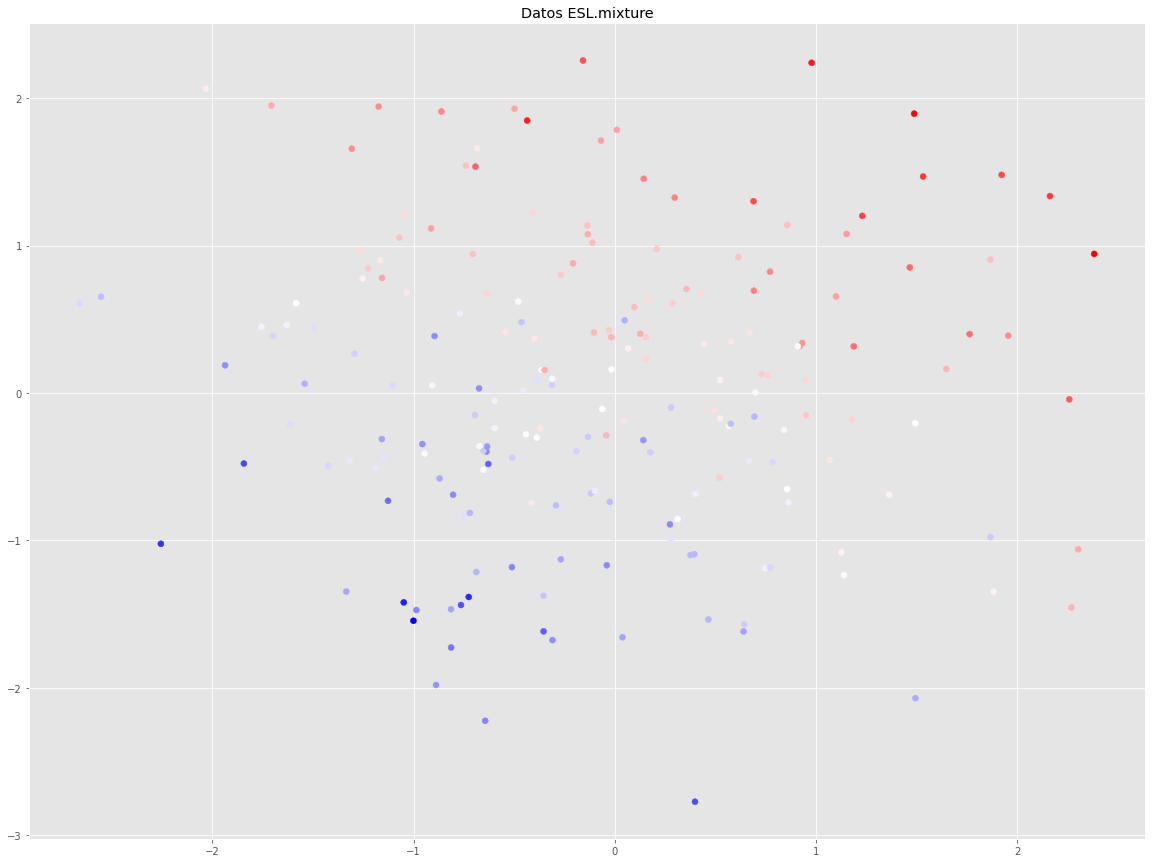

In [5]:
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

In [6]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train_code, y_test_code = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.9,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [7]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train_code)
y_test = lab_enc.fit_transform(y_test_code)

In [8]:
# Creación del modelo SVM lineal
# ==============================================================================

modelo = SVC(C = 1, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)


SVC(C=100, kernel='linear', random_state=123)

ValueError: cannot reshape array of size 5832000 into shape (180,180)

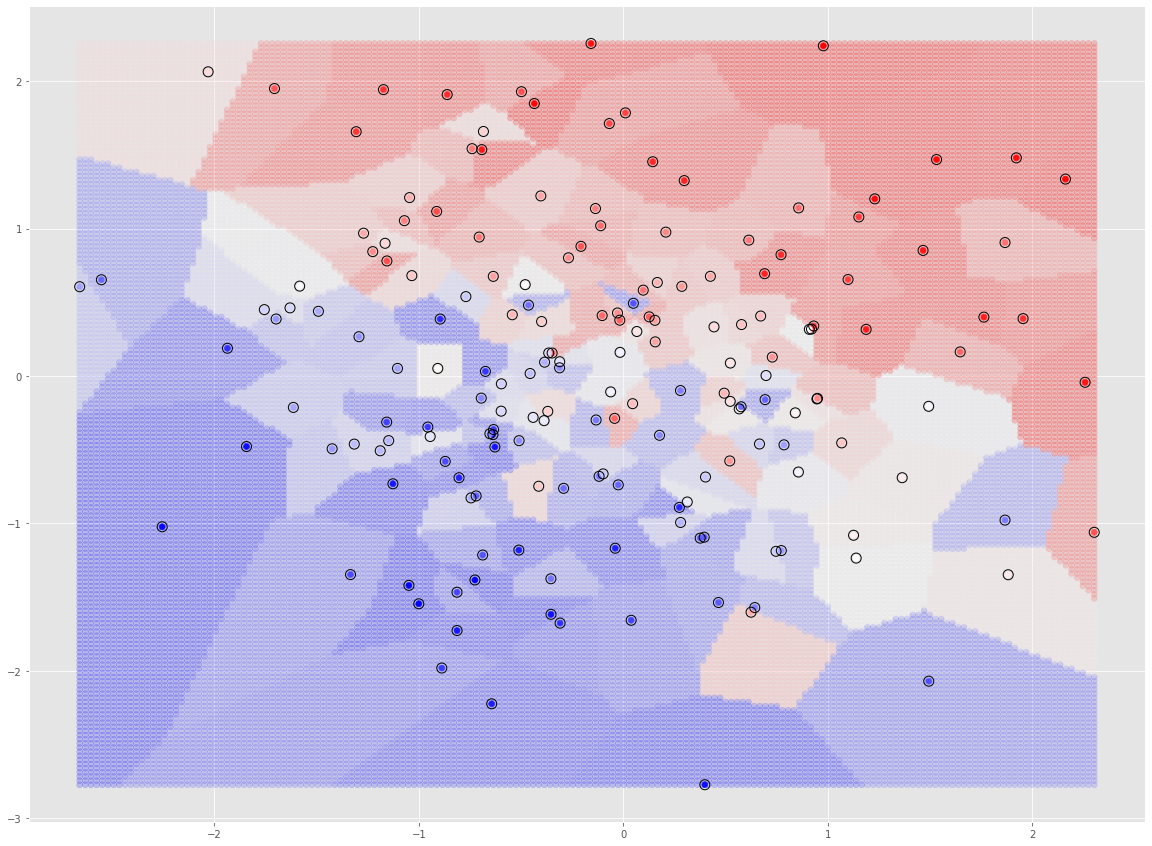

In [9]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), len(X_train))
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), len(y_train))
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(grid[:,0], grid[:,1], c = pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c = y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s = 100, linewidth = 1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación

ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [ ]:
# Predicciones test
# ==============================================================================

predicciones = modelo.predict(X_test)
predicciones


array([118,  47,  12,  59, 176,  43,  86, 127,   0,  25,   7, 130, 134,
       150, 127, 140,  49, 131, 120, 177], dtype=int64)

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 0.0%
